In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('../../Visualization/OASIS/oasis_3.csv')
df = df.dropna(axis=1, how='all') # Drop any empty columns
df = df.dropna(axis=0, how='any') # Drop any rows with empty values 
df = df.rename(columns={'id':'Freesurfer ID', 'dx1':'Diagnosis', 
                        'TOTAL_HIPPOCAMPUS_VOLUME':'TotalHippocampusVol'}) # Rename columns
df = df.drop_duplicates(subset='Subject', keep='first') # Keep only the first visit; this is possible because
                                                        # df is sorted by age
df = df.reset_index(drop=True) # Reset the index
df = df.set_index('Subject')
cols = df.columns.tolist()
cols[2], cols[4] = cols[4], cols[2]
df = df[cols]
df.loc[df['cdr'] < 0.5, 'Diagnosis'] = 'control'
df.loc[~(df['cdr'] < 0.5), 'Diagnosis'] = 'dementia'
print(df['Diagnosis'].unique())
df.loc[df['Diagnosis'] == 'control', 'Diagnosis'] = -1
df.loc[df['Diagnosis'] == 'dementia', 'Diagnosis'] = 1
print(df['Diagnosis'].unique())
df = df.drop(['MR ID', 'Freesurfer ID', 'M/F', 'cdr'], axis=1) # Drop categorical and redundant columns
df = df.drop(['lhCortexVol', 'rhCortexVol', 'lhCorticalWhiteMatterVol', 'rhCorticalWhiteMatterVol', 'L.SurfArea', 'R.SurfArea'], axis=1) # Test drop to reduce dimensionality

['control' 'dementia']
[-1 1]


In [3]:
df = df.sample(n=500)
df.head()

,Diagnosis,Age,mmse,apoe,TotalHippocampusVol,IntraCranialVol,CortexVol,SubCortGrayVol,TotalGrayVol,SupraTentorialVol,CorticalWhiteMatterVol
Subject,,,,,,,,,,,
OAS30264,-1,66.0,30.0,24.0,7524.2,1.369713e+06,386491.889476,50559.0,497518.889476,843083.913810,383959.024334
OAS30416,1,79.0,23.0,23.0,4982.4,1.518609e+06,364092.766767,45652.0,496816.766767,894365.508354,438637.741587
OAS30346,-1,72.0,26.0,33.0,6006.4,1.259386e+06,331199.873892,44375.0,451399.873892,761318.186154,358356.312262
OAS30352,-1,95.0,27.0,34.0,5468.1,1.281720e+06,296176.144841,39815.0,404453.144841,665607.892531,275448.747690
OAS30291,-1,71.0,27.0,33.0,6089.7,1.498484e+06,415080.513982,47818.0,547414.513982,954555.017988,411817.504006


In [4]:
class SVM_random:
    
    def fit(self, X, y):
        self.w = np.random.normal(size=X.shape[1])
        self.b = np.random.normal()
        
        
    def predict(self, X):
        print(X.shape)
        value = np.dot(np.array(X), self.w) + self.b
        #print(f">>>> value {value.shape} >>> {value}")
        y = np.sign(value)
        #print(f">>>> y {y.shape} >>> {y}")
        return y

In [5]:
X = df.drop(['Diagnosis'], axis=1)
y = df['Diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [6]:
# standard z score scaling
def scale(X):
    u = np.mean(X)
    s = np.std(X)
    X_scaled = (X-u)/s
    return X_scaled

In [7]:
X_train = scale(X_train)
X_test = scale(X_test)

In [8]:
model = SVM_random()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

(250, 10)


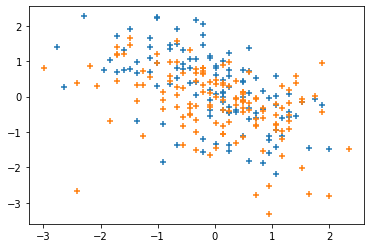

In [9]:
# Predictions using random weights and bias
plt.scatter(x = X_test['Age'].iloc[np.where(predictions==-1)], y = X_test['TotalHippocampusVol'].iloc[np.where(predictions==-1)], marker='+')
plt.scatter(x = X_test['Age'].iloc[np.where(predictions==1)], y = X_test['TotalHippocampusVol'].iloc[np.where(predictions==1)], marker='+')
plt.show()

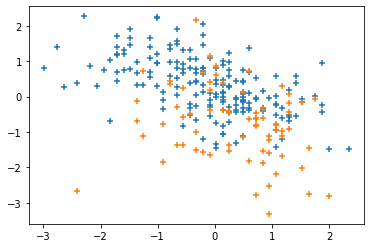

In [10]:
# True value
plt.scatter(x = X_test['Age'].iloc[np.where(y_test==-1)], y = X_test['TotalHippocampusVol'].iloc[np.where(y_test==-1)], marker='+', color='C0')
plt.scatter(x = X_test['Age'].iloc[np.where(y_test==1)], y = X_test['TotalHippocampusVol'].iloc[np.where(y_test==1)], marker='+', color='C1')
plt.show()

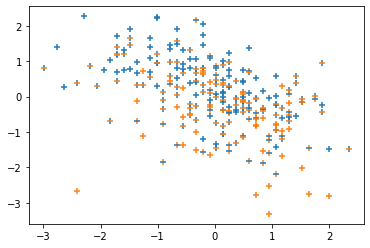

In [11]:
plt.scatter(x = X_test['Age'].iloc[np.where(y_test==-1)], y = X_test['TotalHippocampusVol'].iloc[np.where(y_test==-1)], marker='|', color='C0')
plt.scatter(x = X_test['Age'].iloc[np.where(y_test==1)], y = X_test['TotalHippocampusVol'].iloc[np.where(y_test==1)], marker='|', color='C1')

plt.scatter(x = X_test['Age'].iloc[np.where(predictions==-1)], y = X_test['TotalHippocampusVol'].iloc[np.where(predictions==-1)], marker='_', color='C0')
plt.scatter(x = X_test['Age'].iloc[np.where(predictions==1)], y = X_test['TotalHippocampusVol'].iloc[np.where(predictions==1)], marker='_', color='C1')

In [12]:
predictions = np.sum(predictions-y_test)
print(predictions, y_test.shape)

126.0 (250,)
